# main Library

In [1]:
# Data & Visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Create Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# HyperParameter 
from sklearn.model_selection import GridSearchCV

# XGBoost
import xgboost as xgb

In [2]:
# read Data from csv
data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# information from Data
print(data.shape)
data.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


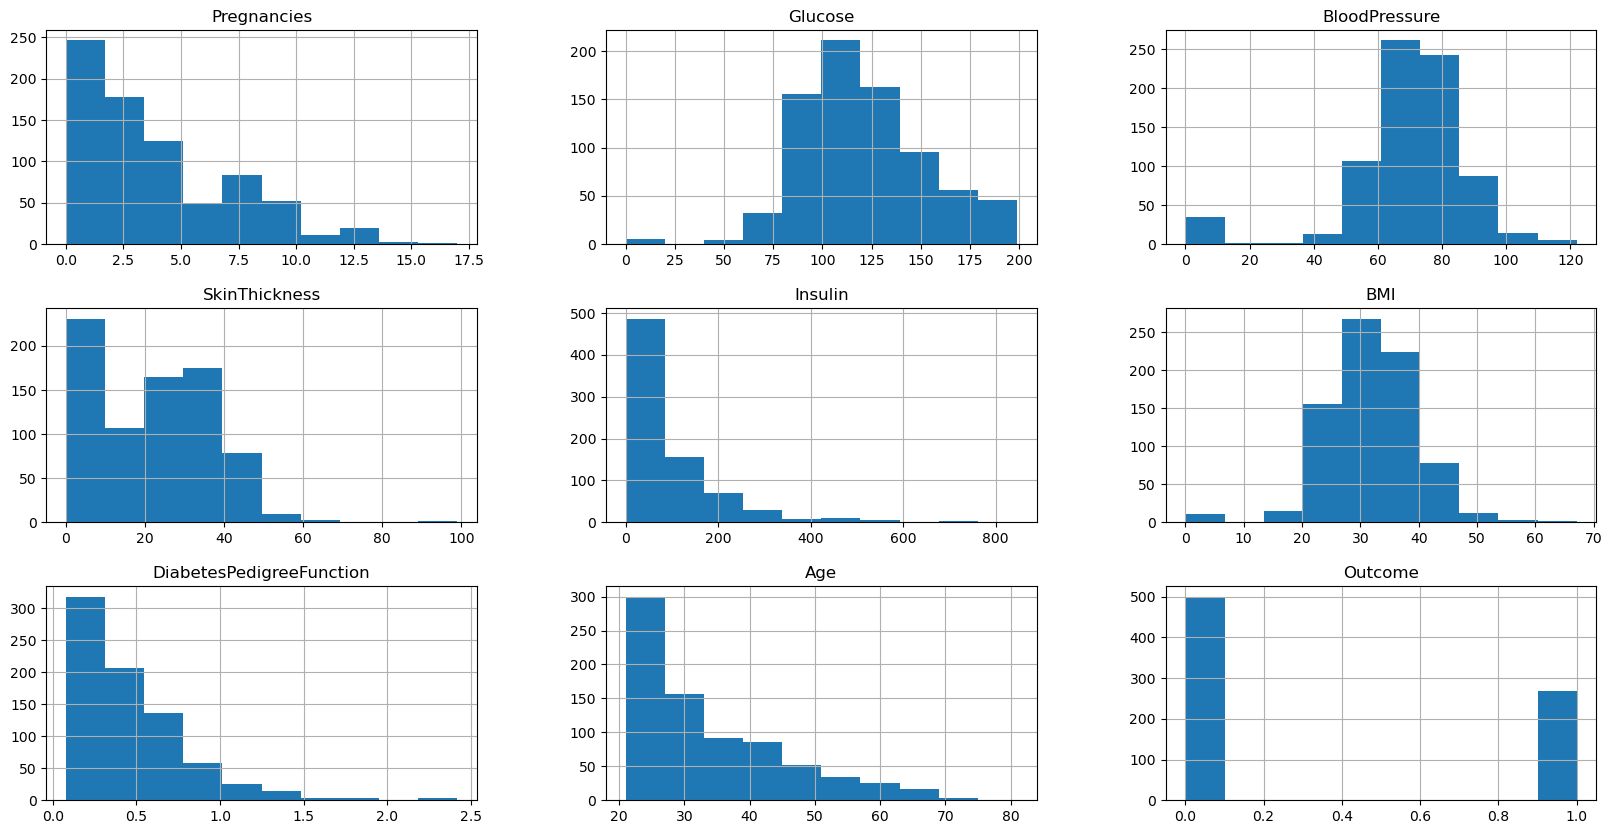

In [4]:
data.hist(figsize=(20, 10));

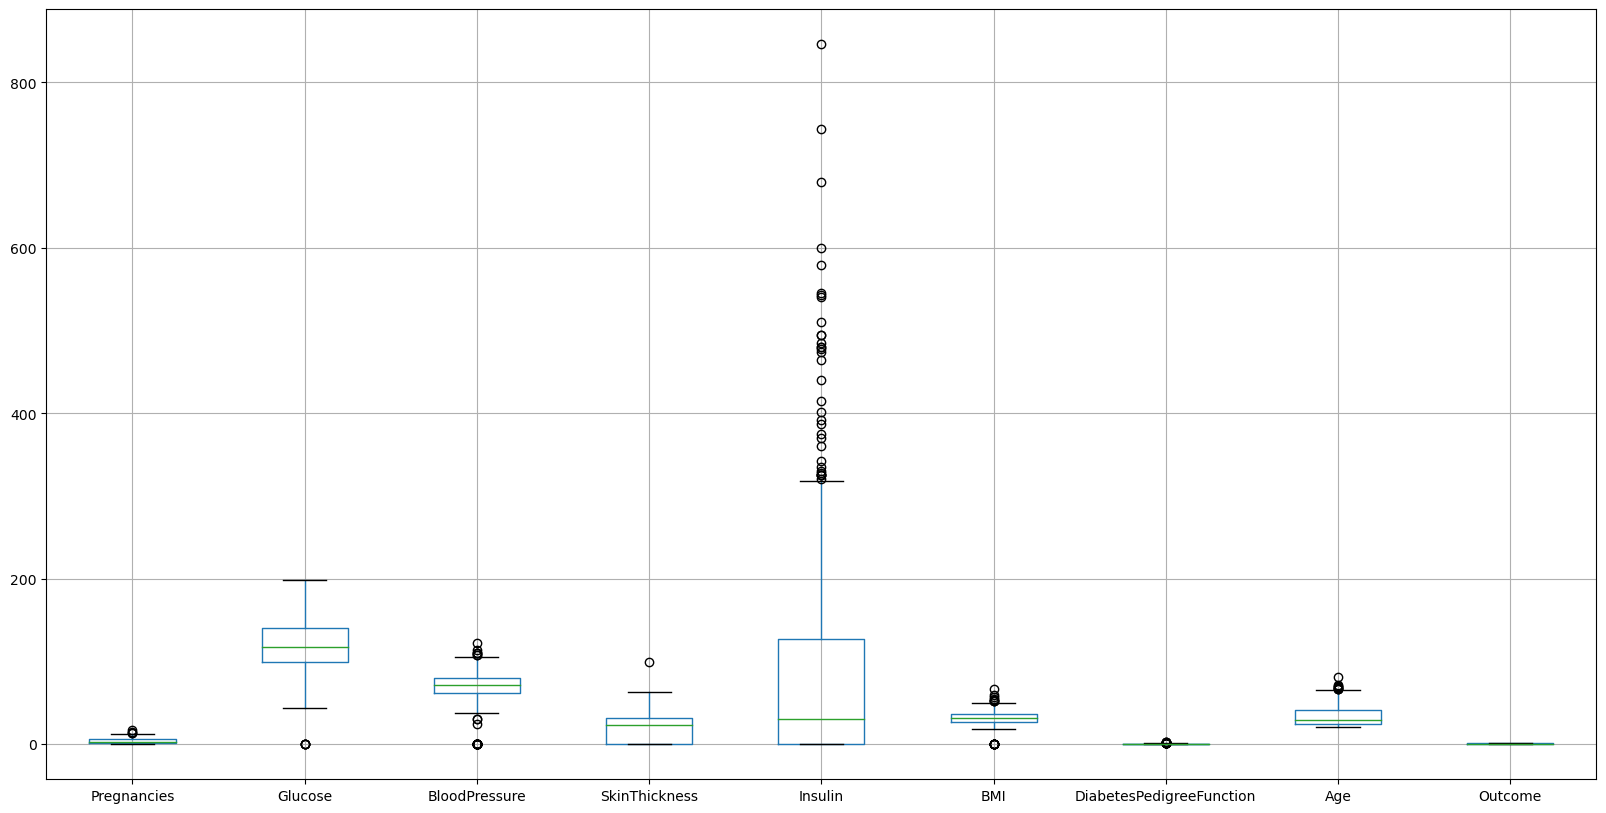

In [5]:
data.boxplot(figsize=(20, 10));

In [6]:
data[data["Insulin"]>350]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1
247,0,165,90,33,680,52.3,0.427,23,0
248,9,124,70,33,402,35.4,0.282,34,0


In [7]:
data[data["SkinThickness"]>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [8]:
data[data["Glucose"]<5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
# Drop This Row Becouse This outlair 

data.drop(data[data["Insulin"]>350].index, axis=0, inplace=True)
data.drop(data[data["SkinThickness"]>80].index, axis=0, inplace=True)
data.drop(data[data["Glucose"]<5].index, axis=0, inplace=True)

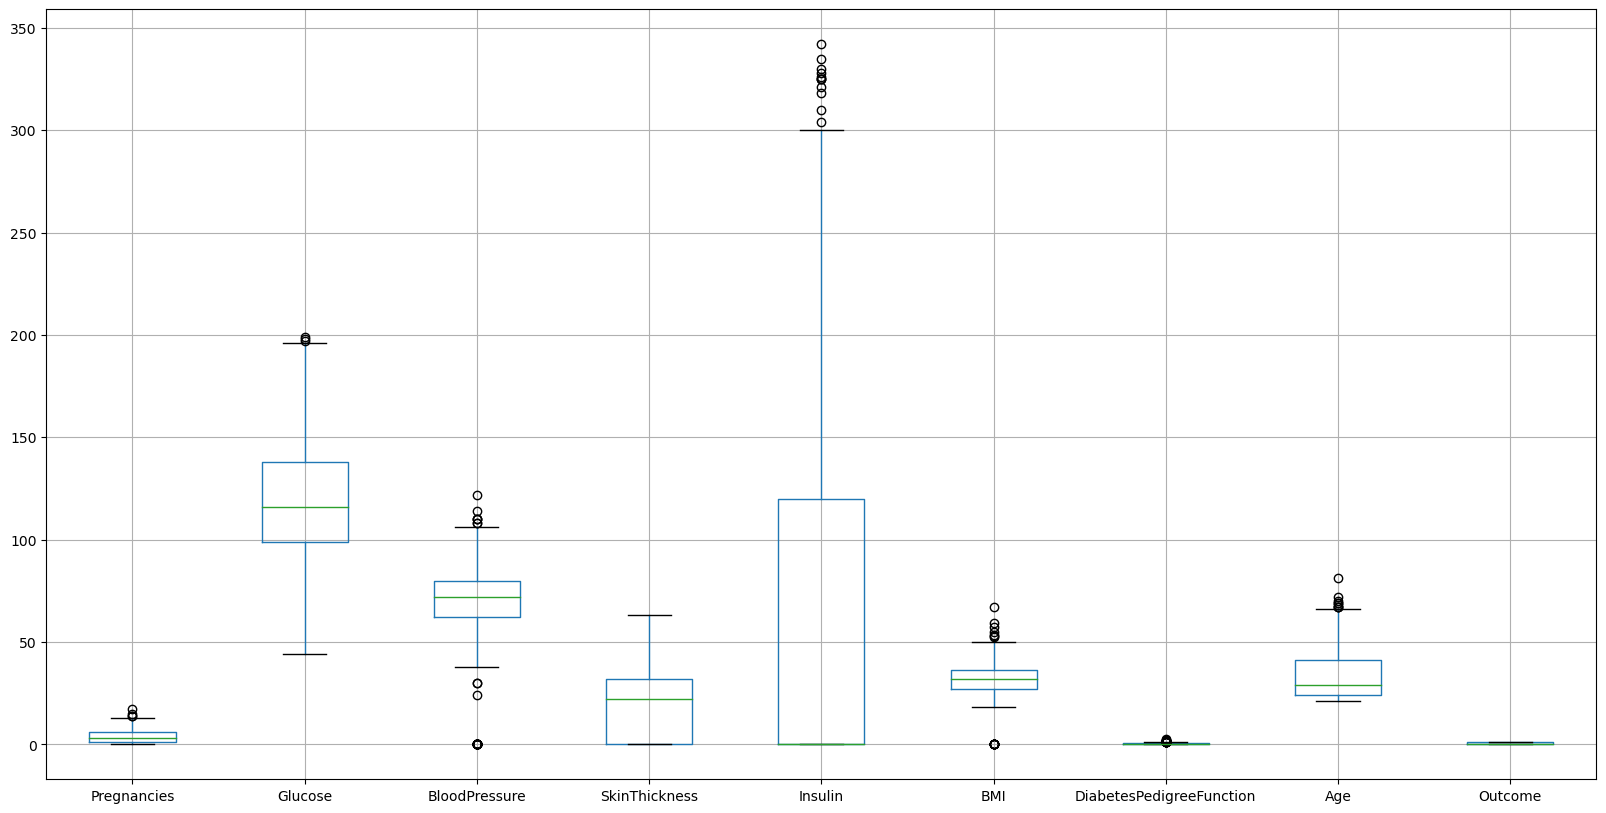

In [10]:
data.boxplot(figsize=(20, 10));

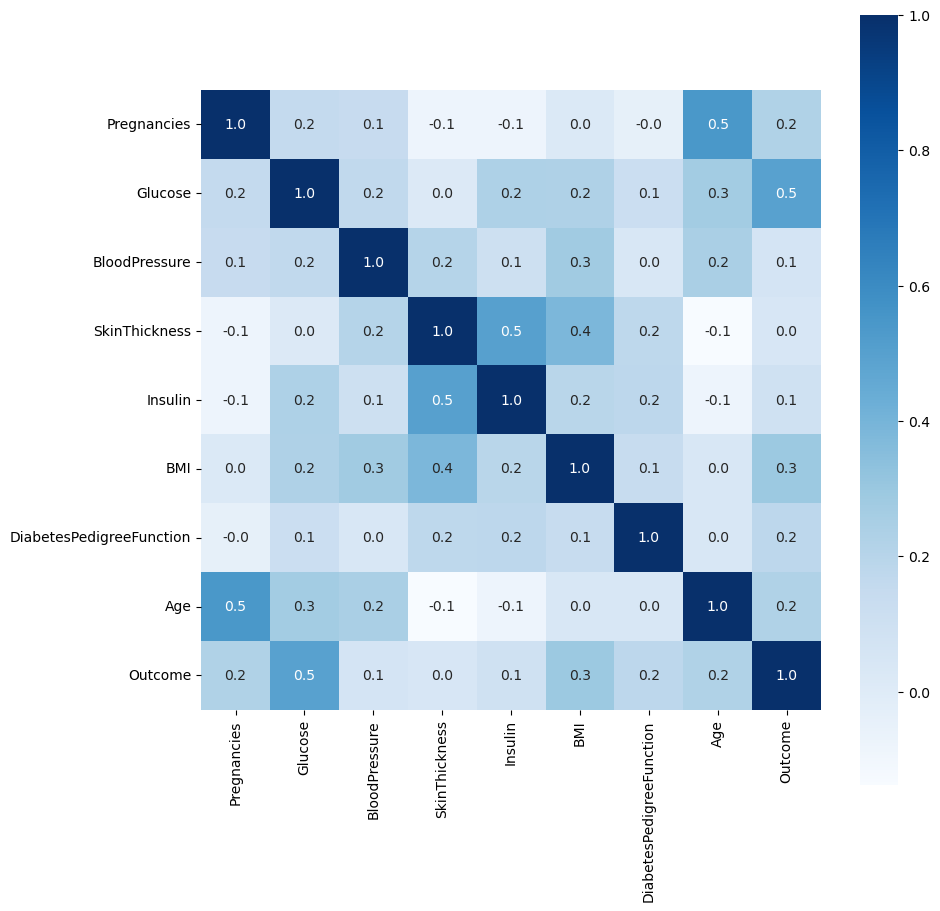

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, square=True, cmap="Blues", fmt="0.1f");

In [12]:
# splitting Data to Train, Test

X = data.drop(columns="Outcome", axis=1)
Y = data["Outcome"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=5)

# Model 1 ==> LogisticRegression

In [14]:
model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_LR.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_LR.score(x_test, y_test)}")

The predict Score Train is ==> 0.7883495145631068
%----------------------------------------------------------%
The predict Score Test is ==> 0.7657657657657657


# Model 2 ==> RandomForest

In [15]:
model_RF = RandomForestClassifier(n_estimators=30, 
                                  max_depth=5, 
                                  min_samples_leaf=3, 
                                  min_samples_split=4, 
                                  max_samples=0.2, 
                                  max_features=4,
                                  n_jobs=-1)

model_RF.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_RF.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_RF.score(x_test, y_test)}")

The predict Score Train is ==> 0.8058252427184466
%----------------------------------------------------------%
The predict Score Test is ==> 0.7747747747747747


In [16]:
# MAke Hyper_parameter In LogisticRegression
param2 = {"n_estimators": np.arange(65, 70, 1),
         "max_depth": np.arange(5, 8, 1),
         "min_samples_split": np.arange(1, 3, 1),
         "min_samples_leaf": np.arange(2, 4, 1),
         "max_samples": [0.18, 0.2, 0.21, 0.24 ]}

new_model_RF = GridSearchCV(estimator=model_RF, 
                             param_grid=param2, 
                             verbose=6,
                             cv=5, n_jobs=-1)

new_model_RF.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\osama\anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\osama\anaconda3\lib\site-packages\joblib\parallel.py",

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=4,
                                              max_samples=0.2,
                                              min_samples_leaf=3,
                                              min_samples_split=4,
                                              n_estimators=30, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7]),
                         'max_samples': [0.18, 0.2, 0.21, 0.24],
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([1, 2]),
                         'n_estimators': array([65, 66, 67, 68, 69])},
             verbose=6)

In [17]:
print(new_model_RF.best_estimator_)
model_RF = new_model_RF.best_estimator_
model_RF.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_RF.score(x_train, y_train)}")
print("%-----------------------------------------------------%")
print(f"The predict Score Test is ==> {model_RF.score(x_test, y_test)}")

RandomForestClassifier(max_depth=6, max_features=4, max_samples=0.24,
                       min_samples_leaf=2, n_estimators=68, n_jobs=-1)
The predict Score Train is ==> 0.8330097087378641
%-----------------------------------------------------%
The predict Score Test is ==> 0.7612612612612613


# model 3 ==> XGBoost

In [23]:
model_XGB = xgb.XGBClassifier()
model_XGB.fit(x_train, y_train)

# print(f"The predict Score Train is ==> {model_XGB.score(x_train, y_train)}")
# print("%----------------------------------------------------------%")
# print(f"The predict Score Test is ==> {model_XGB.score(x_test, y_test)}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# model 3 ==> Adaboost

In [19]:
model_AD = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5, 
                                                                    max_samples=0.4, 
                                                                    min_samples_leaf=5,
                                                                    n_estimators=18, 
                                                                    n_jobs=-1), 
                              n_estimators=5,
                             learning_rate=0.1)

model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

The predict Score Train is ==> 0.8097087378640777
%----------------------------------------------------------%
The predict Score Test is ==> 0.7612612612612613


In [20]:
model_AD1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25, 
                                                                    min_samples_leaf=4,
                                                                    max_features=2,
                                                                    max_leaf_nodes=3), 
                              n_estimators=5,
                              learning_rate=1)


model_AD1.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD1.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD1.score(x_test, y_test)}")

The predict Score Train is ==> 0.7844660194174757
%----------------------------------------------------------%
The predict Score Test is ==> 0.7657657657657657


In [21]:
# MAke Hyper_parameter In LogisticRegression

param4 = {"max_depth": np.arange(5, 20, 5),
          "max_features": np.arange(0, 6, 2)}




model_GSDT = GridSearchCV(estimator=DecisionTreeClassifier(),
                          param_grid=param4,
                          cv=5, 
                          n_jobs=-1)


model_GSDT.fit(x_train, y_train)

param3 = {"n_estimator": [5, 10],
          "base_estimator": [model_GSDT.best_estimator_]}


new_model_AD1 = GridSearchCV(estimator=AdaBoostClassifier(),
                             param_grid=param3,
                             cv=3, n_jobs=-1)

new_model_AD1.fit(x_train, y_train)

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0,

ValueError: Invalid parameter n_estimator for estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_features=2)). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
new_model_AD1.best_estimator_

In [ ]:
new_model_AD1.best_score_

# Build System

In [ ]:
feature_input = np.asarray(
                            list(map(float, input().split(",")))
                           ).reshape(1, -1)

prediction = model_AD1.predict(feature_input)

# print(prediction)

print("%------------------------------%")
if prediction == [0]:
    
    print("The Person is Not Diabetic")
else:
    print("The Person is Diabetic")
    
print("%------------------------------%")